In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
# Load the dataset
data = pd.read_csv('D:/sales_marketing/notebooks/data/Train.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Data preprocessing
# Handle missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)


In [6]:
# Feature selection
X = data.drop([                                                                                                                                                                                                                                                                                                                                                                                                                       , 'Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

In [7]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2


In [8]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [9]:
# Create Column Transformer with 2 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(8523, 44)

In [13]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((6818, 44), (1705, 44))

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth=5, min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, oob_score=False, n_jobs=None, random_state=None),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')  
    


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1141.3922
- Mean Absolute Error: 847.2635
- R2 Score: 0.5596
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1069.5155
- Mean Absolute Error: 792.0186
- R2 Score: 0.5791


Lasso
Model performance for Training set
- Root Mean Squared Error: 1141.6466
- Mean Absolute Error: 846.8907
- R2 Score: 0.5594
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1068.6435
- Mean Absolute Error: 791.2649
- R2 Score: 0.5798


Ridge
Model performance for Training set
- Root Mean Squared Error: 1141.3925
- Mean Absolute Error: 847.2377
- R2 Score: 0.5596
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1069.4972
- Mean Absolute Error: 791.9987
- R2 Score: 0.5792


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 996.8166
- Mean Absolute Error: 715.1597
- R2 Sco

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.617041
7,CatBoosting Regressor,0.591673
1,Lasso,0.579834
2,Ridge,0.579162
0,Linear Regression,0.579148
6,XGBRegressor,0.511160
3,K-Neighbors Regressor,0.499361
8,AdaBoost Regressor,0.413333
4,Decision Tree,0.172058


Text(0, 0.5, 'Predicted')

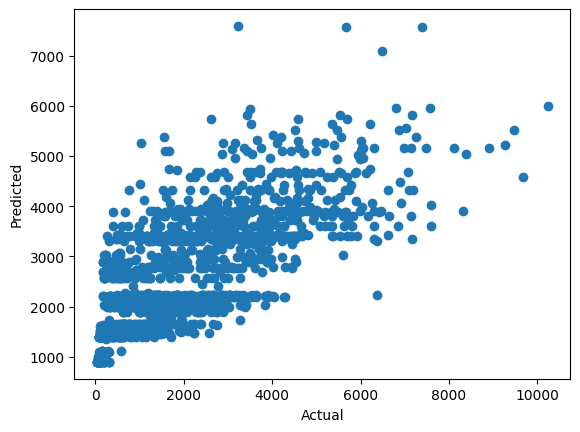

In [17]:
plt.scatter(y_test,y_test_pred )
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Item_Outlet_Sales'>

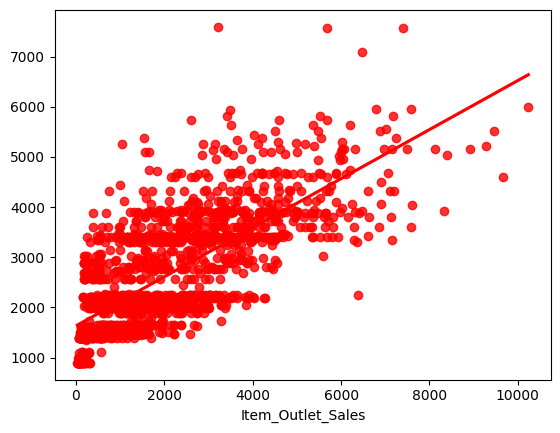

In [18]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
7503,1743.0644,1652.912382,90.152018
2957,356.8688,1468.663500,-1111.794700
7031,377.5086,1468.663500,-1091.154900
1084,5778.4782,4429.234165,1349.244035
856,2356.9320,3610.293611,-1253.361611
...,...,...,...
7205,3004.0896,2572.445843,431.643757
3257,890.8404,2264.101687,-1373.261287
6346,629.1810,1468.663500,-839.482500
6318,253.0040,1394.718826,-1141.714826
